<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-ChristianTavera01/blob/main/Ago25-26/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook estara lo correspondiente a la tarea 3 de ML
1)Crear funcion para saber el costo de un modelo de cierto grado.
2)Grafica grado vs costo
3)Grafica usando cross validation vs grado

In [1]:
import numpy as np
import matplotlib.pyplot as plt

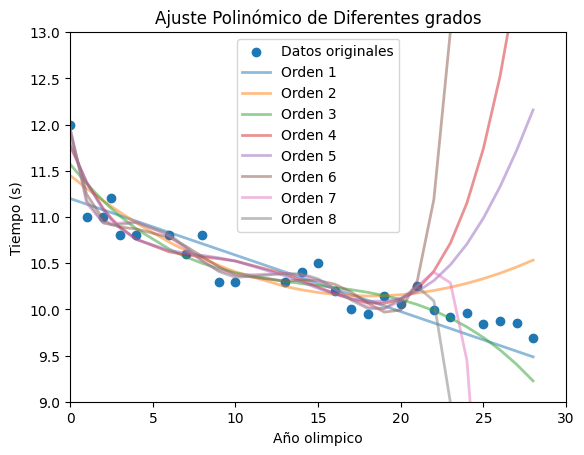

In [3]:
#De manera similar a lo visto en clase:
def regresion_pol(x, y, grado):
    X = np.vander(x, grado + 1, increasing=True)
    t = y
    XX = np.dot(X.T, X)
    invXX = np.linalg.inv(XX)
    Xt = np.dot(X.T, t)
    w = np.dot(invXX, Xt)

    y_pred = np.dot(X, w) #Calculamos la prediccion con los pesos
    mse = np.mean((y_pred - y)**2) #Error cuadratico medio
    return w, mse


data = np.loadtxt("/content/olympic100m_men.txt", delimiter=",").T
x = data[0]
y = data[1]

# Reescalando como en clase
x = (x - 1896) / 4
grado_m = 8
plt.scatter(x, y, label="Datos originales")

for grado in range(1, grado_m + 1):
    w_test, costo = regresion_pol(x[:20], y[:20], grado)
    curva_ajustada = np.zeros_like(x)

    for i in range(len(w_test)):
        curva_ajustada += w_test[i] * x**i

    plt.plot(x, curva_ajustada, '-', linewidth=2, label=f'Orden {grado}', alpha=0.5)

plt.ylim(9, 13)
plt.xlim(0, 30)

plt.legend()
plt.xlabel('Año olimpico')
plt.ylabel('Tiempo (s)')
plt.title('Ajuste Polinómico de Diferentes grados')
plt.show()

La grafica de grado vs costo no la logre comprender asi que salatare ese paso.

In [6]:
#Cross validation
def cross_validation_cost(x, y, grado):
    N = len(x)
    total_mse = 0

    for i in range(N):
        x_train = np.delete(x, i)
        y_train = np.delete(y, i)
        x_val = x[i]
        y_val = y[i]

        w_train, _ = regresion_pol(x_train, y_train, grado)
        mse_val = costo_validacion(np.array([x_val]), np.array([y_val]), w_train, grado)
        total_mse += mse_val

    avg_mse = total_mse / N
    return avg_mse


Al no contar con el costo de validacion tampoco podre graficar el cross validation, por lo que esperare a la clase para ver como puedo realizar esto.